# PyTorch Datasets & DataLoaders: A Comprehensive Tutorial

## Table of Contents
1. [Introduction](#introduction)
2. [Understanding PyTorch Datasets](#understanding-pytorch-datasets)
3. [Loading Pre-built Datasets](#loading-pre-built-datasets)
4. [Creating Custom Datasets](#creating-custom-datasets)
5. [Working with DataLoaders](#working-with-dataloaders)
6. [Best Practices and Tips](#best-practices-and-tips)

## Introduction

In deep learning, efficient data handling is crucial for model training. PyTorch provides two fundamental tools for this purpose:
- `Dataset`: Represents your data collection
- `DataLoader`: Handles batch processing and data iteration

This tutorial will guide you through both concepts with practical examples.

## Understanding PyTorch Datasets

### What is a Dataset?
A Dataset in PyTorch is an abstract class that represents a collection of data points. Each data point can consist of:
- Features (e.g., images, text, audio)
- Labels (corresponding target values)


In [2]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
import matplotlib.pyplot as plt



### Key Components of a Dataset
Every PyTorch Dataset must implement three core methods:
1. `__init__()`: Constructor that runs once when instantiating the Dataset
2. `__len__()`: Returns the total number of samples
3. `__getitem__()`: Returns a specific sample given an index

## Loading Pre-built Datasets

Let's start with a practical example using the Fashion-MNIST dataset:



In [3]:
# Loading the Fashion-MNIST dataset
training_data = datasets.FashionMNIST(
    root="data",          # Directory where the data will be stored
    train=True,          # Specifies this is training data
    download=True,       # Downloads the data if not present
    transform=ToTensor() # Converts images to PyTorch tensors
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


### Understanding the Parameters:
- `root`: The directory where datasets will be stored
- `train`: Boolean indicating whether to load training or test set
- `download`: If True, downloads the dataset from the internet
- `transform`: Functions to modify the data (e.g., converting to tensor)

### Exploring the Dataset

Let's visualize some samples from our dataset:

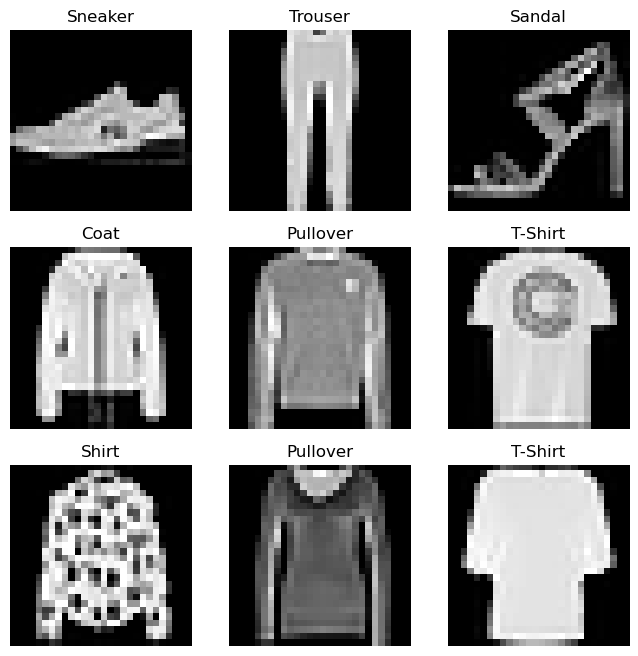

In [5]:
# Define the class labels
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Visualization function
def visualize_samples(dataset, num_samples=9):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(num_samples):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx]
        figure.add_subplot(rows, cols, i + 1)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

# Visualize samples
visualize_samples(training_data)

## Creating Custom Datasets

Now, let's create a custom Dataset for handling image data:

In [7]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        """
        Args:
            annotations_file (string): Path to CSV file with annotations
            img_dir (string): Directory with all the images
            transform: Optional transforms to apply to images
            target_transform: Optional transforms to apply to labels
        """
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        """Returns the total number of samples"""
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        """Returns one sample of data, data and label (X, y)"""
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        
        # Apply transforms if any
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
            
        return image, label

### Key Points About Custom Datasets:
1. The `__init__` method sets up the dataset:
   - Reads the annotations file (CSV)
   - Stores the image directory path
   - Defines transforms
   
2. The `__len__` method is straightforward:
   - Returns the total number of samples
   
3. The `__getitem__` method is crucial:
   - Loads an image given an index
   - Applies any transforms
   - Returns the image-label pair


## Working with DataLoaders

The DataLoader wraps a Dataset and provides:
- Batch processing
- Shuffling
- Parallel data loading
- Memory efficiency

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


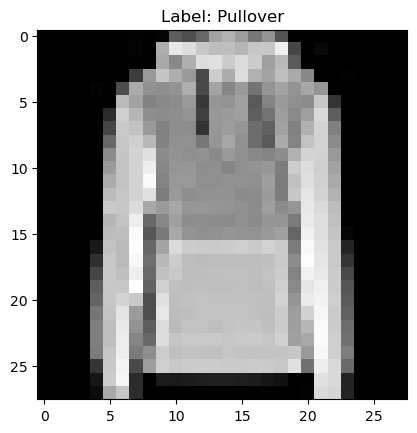

In [10]:
from torch.utils.data import DataLoader

# Create DataLoader instances
train_dataloader = DataLoader(
    training_data,    # Dataset to load from
    batch_size=64,    # Number of samples per batch
    shuffle=True      # Shuffle the data
)

test_dataloader = DataLoader(
    test_data,
    batch_size=64,
    shuffle=True
)

# Example of iterating through the DataLoader
def explore_batch(dataloader):
    # Get one batch of training data
    features, labels = next(iter(dataloader))
    
    print(f"Feature batch shape: {features.size()}")
    print(f"Labels batch shape: {labels.size()}")
    
    # Display first image and its label
    img = features[0].squeeze()
    label = labels[0]
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {labels_map[label.item()]}")
    plt.show()

explore_batch(train_dataloader)


### Understanding DataLoader Parameters:
- `batch_size`: Number of samples in each batch
- `shuffle`: Whether to randomize the order of samples
- `num_workers`: Number of subprocesses for data loading
- `drop_last`: Whether to drop the last incomplete batch

## Best Practices and Tips

1. **Memory Management**:
   - Use appropriate batch sizes based on your GPU memory
   - Consider using `num_workers` for faster data loading
   
2. **Data Transforms**:
   - Apply transforms in the Dataset class
   - Common transforms include:
     - Normalization
     - Resizing
     - Data augmentation

3. **Custom Datasets**:
   - Keep the data loading logic clean and efficient
   - Handle edge cases (missing files, corrupt data)
   - Add appropriate error handling

4. **DataLoader Usage**:
   - Use `shuffle=True` for training
   - Consider `shuffle=False` for validation/testing
   - Adjust `batch_size` based on your model and memory constraints

## Practical Exercise

Try creating a custom dataset for your own data:
1. Organize your data files
2. Create a CSV file with annotations
3. Implement the CustomDataset class
4. Create appropriate data transforms
5. Set up DataLoader with suitable parameters

Remember: Good data handling is crucial for successful model training!